In [13]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [12]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.4 MB 326.8 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 393.8 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 438.1 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 532.5 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 551.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 565.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2

In [15]:
from mlxtend.preprocessing import TransactionEncoder

# my_movies data

In [71]:
data = pd.read_csv("my_movies (1).csv")

In [72]:
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [73]:
#preprocessing
df1 = pd.get_dummies(data)

In [74]:
df1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,False,True,False,False,False,False,True,False,True,True
1,0,1,0,0,1,0,0,0,1,0,...,False,False,False,True,True,False,False,False,False,False
2,0,0,1,0,0,1,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
3,1,1,0,0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
4,1,1,0,0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
5,1,1,0,0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
6,0,0,0,1,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
7,0,1,0,0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
8,1,1,0,0,1,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
9,1,1,0,0,0,0,0,1,0,1,...,True,False,False,False,False,True,False,False,True,False


In [75]:
#Apriori Algorithm
frequent_itemsets = apriori(df1, min_support =0.1, use_colnames = True)

C:\Users\anura\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [76]:
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ..."
1393,0.1,"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ..."
1394,0.1,"(V5_LOTR2, Sixth Sense, V4_Green Mile, Green M..."
1395,0.1,"(LOTR1, V5_LOTR2, V4_Green Mile, Green Mile, V..."


In [77]:
rules = association_rules(frequent_itemsets, metric="lift" , min_threshold = 0.7)

In [78]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(Harry Potter1),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64249,(LOTR2),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(V2_LOTR1),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


In [79]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32126,"(LOTR1, LOTR2, Harry Potter1, Green Mile)","(V5_LOTR2, Sixth Sense, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42207,"(LOTR1, V1_Sixth Sense, Harry Potter1, V2_LOTR1)","(LOTR2, V5_LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42195,"(LOTR1, V1_Sixth Sense, V5_LOTR2, LOTR2)","(Harry Potter1, V2_LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42196,"(LOTR1, V1_Sixth Sense, V5_LOTR2, V2_LOTR1)","(LOTR2, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42197,"(LOTR1, LOTR2, V5_LOTR2, Harry Potter1)","(V1_Sixth Sense, V2_LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42198,"(LOTR1, V5_LOTR2, Harry Potter1, V2_LOTR1)","(LOTR2, V1_Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42199,"(LOTR1, LOTR2, V5_LOTR2, V2_LOTR1)","(V1_Sixth Sense, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42200,"(LOTR1, V1_Sixth Sense, Harry Potter1, Green M...","(LOTR2, V5_LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42201,"(LOTR1, V1_Sixth Sense, LOTR2, Green Mile)","(V5_LOTR2, Harry Potter1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
42202,"(LOTR1, V1_Sixth Sense, V2_LOTR1, Green Mile)","(LOTR2, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [80]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(Harry Potter1),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64249,(LOTR2),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(V2_LOTR1),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


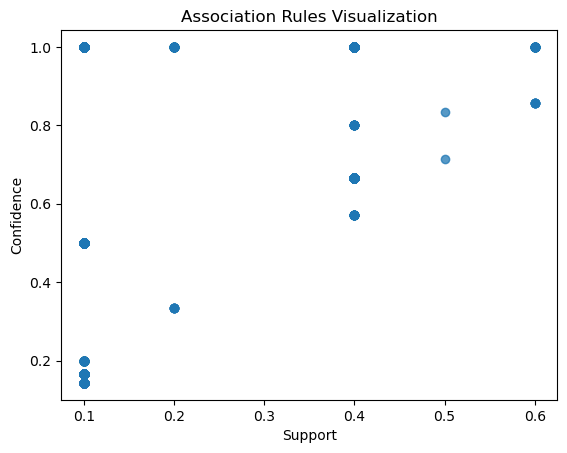

In [81]:

import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Visualization')
plt.show()

# books data

In [82]:
data1 = pd.read_csv("book (1).csv")

In [83]:
data1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [84]:
#preprocessing
df2 = pd.get_dummies(data1)

In [85]:
df2

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [89]:
#Apriori Algorithm
frequent_itemsets1 = apriori(df2, min_support =0.1, use_colnames = True)

C:\Users\anura\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [90]:
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [91]:
rules = association_rules(frequent_itemsets1, metric="lift" , min_threshold = 0.7)

In [92]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [93]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298


In [68]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(Harry Potter1),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64249,(LOTR2),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(V2_LOTR1),"(LOTR1, V5_LOTR2, Sixth Sense, V4_Green Mile, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


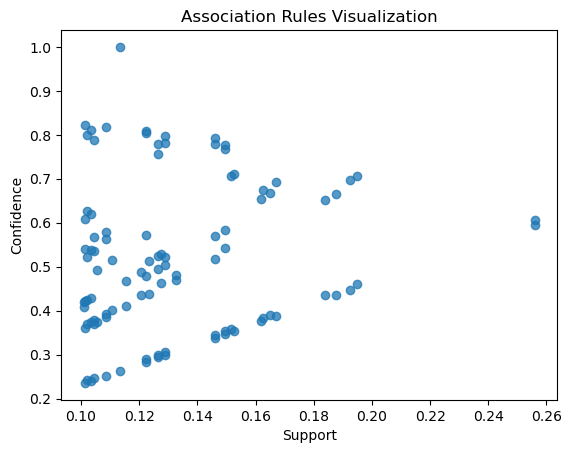

In [94]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.75)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Visualization')
plt.show()